# Welcome to the Strava Analysis
In this case, I will going to explain how to extract your strava records to make a briefly analysis of your performance in your activities

You need to know that It is a very simple example using my own account. Let's get started!

## Import Libraries
In this section, we are using different libraries to extract, handle and visualize the data records

In [1]:
import requests
import urllib3
import pandas as pd
from pandas.io.json import json_normalize

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import datetime as dt2

import warnings
warnings.filterwarnings("ignore") #This is only to make cleaner the notebook. 

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

## Connecting to the Strava API
* You need to get the info about Client_Id, Client_Secret and Token to extract the data of Strava. If you don't know these information, you can go to this [link](https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde) (I based on that tutorial to make this notebook) and follow the steps to identify your data.

In [2]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

payload = {
    'client_id': "xxxxx",                                        #make sure to don't publish this information
    'client_secret': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', #make sure to don't publish this information
    'refresh_token': 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx', #make sure to don't publish this information
    'grant_type': "refresh_token",
    'f': 'json'
}

print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
#print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()
print ("Succesful Connection...\n")
print("------------Example of Data--------------")
print("Name of Activity: " + my_dataset[0]["name"])
print("Distance traveled: " + str(my_dataset[0]["distance"]))
print("Start date: " + my_dataset[0]["start_date"])
print("-----------------------------------------")

Requesting Token...

Succesful Connection...

------------Example of Data--------------
Name of Activity: Morning Ride
Distance traveled: 22784.4
Start date: 2022-01-16T13:59:59Z
-----------------------------------------


* Now, we transform the Json to a Pandas Dataframe

In [3]:
activities = json_normalize(my_dataset)
activities.head()

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,start_date,...,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state
0,2,Morning Ride,22784.4,2812,4045,0.0,Ride,NaN,6533511967,2022-01-16T13:59:59Z,...,garmin_push_8128790763,False,18,0,False,27518347,1,a6533511967,auu\vyxbM?Hd@Jp@QF?b@Fj@NhBn@lAj@jAz@j@l@f@r@r...,2
1,2,VALS con doble pinchazo 😢,62466.6,9288,12145,583.0,Ride,10.0,6533038169,2022-01-16T10:25:08Z,...,garmin_push_8128290820,False,120,5,False,27518347,1,a6533038169,}xr[|wbcMORYKdBuAnA[l@u@q@gBwDaQc@gFBiGzBcU`Dk...,2
2,2,Volviendo a Patios 💪🏼,24808.2,4969,5964,479.0,Ride,10.0,6500953049,2022-01-10T10:21:21Z,...,garmin_push_8092700735,False,38,0,False,27518347,1,a6500953049,ayr[zxbcMI?Yu@dB_BjBmAVg@eCyFwAwEc@sBs@}FB{DTa...,2
3,2,Ciclovía,22202.1,5850,7419,347.0,Ride,10.0,6496863054,2022-01-09T12:25:27Z,...,garmin_push_8088036342,False,0,0,False,27518347,1,a6496863054,qur[npbcMBAEII?KKeBwDo@kBm@uAqD{@kFaAwDw@aG}@g...,2
4,2,La última del año con Papi!,58945.4,11336,14207,606.0,Ride,10.0,6451570932,2021-12-31T10:32:00Z,...,garmin_push_8037489140,False,30,6,False,27518347,1,a6451570932,aj{aAznogM{LoE_CiAwBk@WNc@pAg@n@aWxTaAxA_BtDkE...,2


In [4]:
activities.columns

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'workout_type', 'id', 'start_date',
       'start_date_local', 'timezone', 'utc_offset', 'location_city',
       'location_state', 'location_country', 'achievement_count',
       'kudos_count', 'comment_count', 'athlete_count', 'photo_count',
       'trainer', 'commute', 'manual', 'private', 'visibility', 'flagged',
       'gear_id', 'start_latlng', 'end_latlng', 'start_latitude',
       'start_longitude', 'average_speed', 'max_speed', 'average_cadence',
       'average_temp', 'average_watts', 'kilojoules', 'device_watts',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed',
       'athlete.id', 'athlete.resource_state', 'map.id',
       'map.summary_poly

## Preprocessing and Cleaning 
* In this case, We need to manipulate our data to make the analysis easier. The preprocessing and cleaning used was:
    * Convert Timestamp to a datetime understanding column
    * Extract the time
    * Extract the date
    * Extract the year
    * Filter the rows to get only the info since 2019-01-01 (because the data of 2018 in my case is noising my analysis =p )
    * Extract the month
    * Extract the day name
    * Extract the time spent for each activity
    * Get the hour, minutes and seconds in different columns
    * Convert the average speed into Kilometers per hours (Because the data came in meter per seconds)
    * Convert the max speed into Kilometers per hours (Because the data came in meter per seconds)
    * Convert the distance into kilometers (Because the data came in meters)

In [5]:
cols = ['name', 'upload_id', 'type', 'distance', 'moving_time',   
         'average_speed', 'max_speed','total_elevation_gain',
         'start_date_local'
       ]
dfStrava = activities[cols]
#Break date into start time and date
dfStrava['start_date_local'] = pd.to_datetime(dfStrava['start_date_local'])
dfStrava['start_time'] = dfStrava['start_date_local'].dt.time
dfStrava['start_date_local'] = dfStrava['start_date_local'].dt.date
dfStrava['year'] = pd.DatetimeIndex(dfStrava['start_date_local']).year
dfStrava = dfStrava[dfStrava['year']>2018]
dfStrava['month'] = pd.DatetimeIndex(dfStrava['start_date_local']).month
dfStrava['weekday'] = dfStrava[['start_date_local']].apply(lambda x: dt2.datetime.strftime(x['start_date_local'], '%A'), axis=1)
dfStrava['Time_Spent'] = pd.to_timedelta(dfStrava['moving_time'],'s')
dfStrava[['numDays','days','timestamp_Spent']] = dfStrava['Time_Spent'].astype('str').str.split(" ", expand=True)
dfStrava[['hours','minutes','seconds']] = dfStrava['timestamp_Spent'].astype('str').str.split(":", expand=True)
dfStrava['avg_speed_kmH'] = dfStrava['average_speed']*3.6
dfStrava['max_speed_kmH'] = dfStrava['max_speed']*3.6
dfStrava['distance_km'] = dfStrava['distance']/1000  

cols2 = ['name', 'start_date_local', 'start_time',
         'year', 'month', 'weekday',
         'moving_time','timestamp_Spent','hours','minutes','seconds',
         'distance_km', 'total_elevation_gain',
        'avg_speed_kmH', 'max_speed_kmH']

dfStrava = dfStrava[cols2]
dfStrava.head(5)

,name,start_date_local,start_time,year,month,weekday,moving_time,timestamp_Spent,hours,minutes,seconds,distance_km,total_elevation_gain,avg_speed_kmH,max_speed_kmH
0,Morning Ride,2022-01-16,08:59:59,2022,1,Sunday,2812,00:46:52,00,46,52,22.7844,0.0,29.1708,44.8416
1,VALS con doble pinchazo 😢,2022-01-16,05:25:08,2022,1,Sunday,9288,02:34:48,02,34,48,62.4666,583.0,24.2136,65.8296
2,Volviendo a Patios 💪🏼,2022-01-10,05:21:21,2022,1,Monday,4969,01:22:49,01,22,49,24.8082,479.0,17.9748,48.8016
3,Ciclovía,2022-01-09,07:25:27,2022,1,Sunday,5850,01:37:30,01,37,30,22.2021,347.0,13.6620,28.6920
4,La última del año con Papi!,2021-12-31,05:32:00,2021,12,Friday,11336,03:08:56,03,08,56,58.9454,606.0,18.7200,48.4848


## Brief Data Analysis

* Average Speed (km/h) vs Distance (km)

In the chart we can see there are 2 different behaviours. In many cases, when the distance is around of 30Km the average speed is higher. That is weird!

Text(0.5, 1.0, 'Average Speed (km/h) vs Distance (km)')

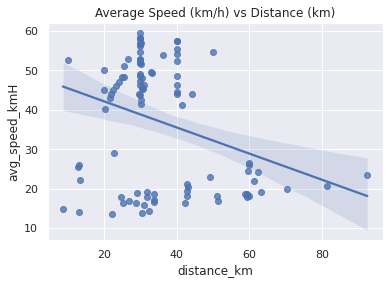

In [6]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='distance_km', y = 'avg_speed_kmH', data = dfStrava).set_title("Average Speed (km/h) vs Distance (km)")

* Total Elevation Gain (m) vs Distance (km/h)

Now, we can see that exist many activities with total elevation gain in 0 mts. As we are talking about Ride activities in bycicle, is not normal to make an activity without elevation at least you are riding in-house.  

Text(0.5, 1.0, 'Total Elevation Gain (m) vs Distance (km/h)')

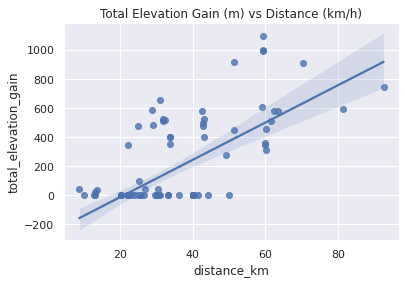

In [7]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='distance_km', y = 'total_elevation_gain', data = dfStrava).set_title("Total Elevation Gain (m) vs Distance (km/h)")

* Average Speed (km/h) vs Total Elevation Gain (m)

Now, comparing the Average Speed vs the Elevation, we can see the higher average speed when the elevation gain is 0. In fact, this is a pattern. Spoiler, this behaviour is because there are many records when I training with a simulator.

Text(0.5, 1.0, 'Average Speed (km/h) vs Total Elevation Gain (m)')

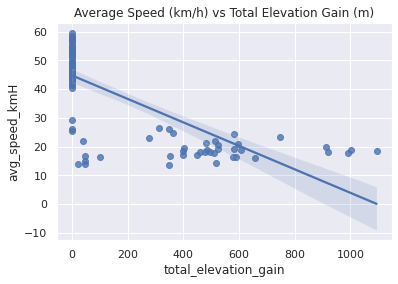

In [8]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='total_elevation_gain', y = 'avg_speed_kmH', data = dfStrava).set_title("Average Speed (km/h) vs Total Elevation Gain (m)")

* Boxplot of Distance per Year

The 2021 was the year when I spent most time riding in bycicle and the chart show us that.

<AxesSubplot:xlabel='year', ylabel='distance_km'>

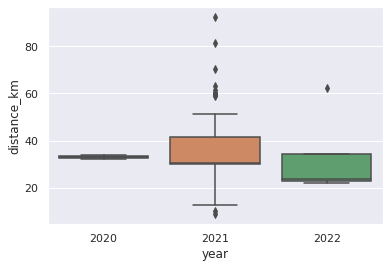

In [9]:
sns.set_theme(style="darkgrid")
sns.boxplot(x="year", y="distance_km", data=dfStrava)

* Time Spent in activities

This chart represent the participation of the time spent in activities. This show us the mayority of the activities, in terms of time spent was less than 01 hour.

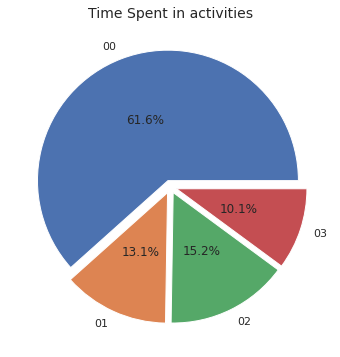

In [10]:
data = dfStrava.groupby("hours")["hours"].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Time Spent in activities", fontsize=14);

* Total Distance (km) per week day

Finally, the weekday with most kilometers recorred, was the sunday then Tuesday

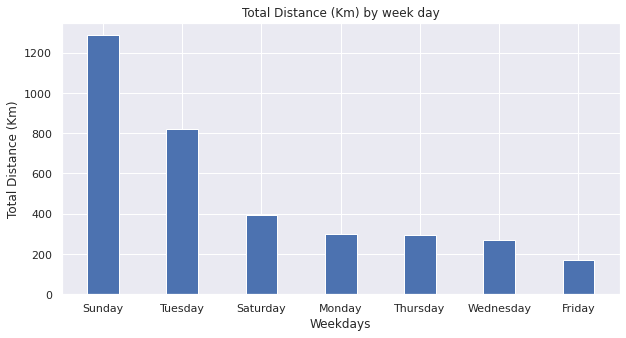

In [11]:
data = dfStrava.groupby("weekday").sum().reset_index()[['weekday','distance_km']].sort_values('distance_km', ascending=False)

weekdays = data['weekday']
totalDistance = data['distance_km']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(weekdays, totalDistance,
        width = 0.4)
 
plt.xlabel("Weekdays")
plt.ylabel("Total Distance (Km)")
plt.title("Total Distance (Km) by week day")
plt.show()

## Data Analysis without Indoor trainings

Now, we are going to do the same analysis but filtering the activities with total elevation > 0, because we need to drop off the indoor trainings

In [12]:
dfStravaWithElv = dfStrava[dfStrava['total_elevation_gain'] > 0 ]
dfStravaWithElv.head()

,name,start_date_local,start_time,year,month,weekday,moving_time,timestamp_Spent,hours,minutes,seconds,distance_km,total_elevation_gain,avg_speed_kmH,max_speed_kmH
1,VALS con doble pinchazo 😢,2022-01-16,05:25:08,2022,1,Sunday,9288,02:34:48,02,34,48,62.4666,583.0,24.2136,65.8296
2,Volviendo a Patios 💪🏼,2022-01-10,05:21:21,2022,1,Monday,4969,01:22:49,01,22,49,24.8082,479.0,17.9748,48.8016
3,Ciclovía,2022-01-09,07:25:27,2022,1,Sunday,5850,01:37:30,01,37,30,22.2021,347.0,13.6620,28.6920
4,La última del año con Papi!,2021-12-31,05:32:00,2021,12,Friday,11336,03:08:56,03,08,56,58.9454,606.0,18.7200,48.4848
5,Morning Ride,2021-12-29,05:28:01,2021,12,Wednesday,10883,03:01:23,03,01,23,51.3252,449.0,16.9776,51.0588


* Average Speed (km/h) vs Distance (km)

The trend of the correlation is ascending. That means, while more distance covered more average speed recorded (at least with most probability).

Text(0.5, 1.0, 'Average Speed (km/h) vs Distance (km)')

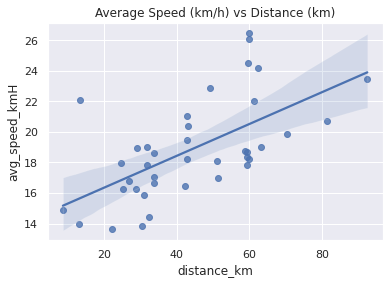

In [13]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='distance_km', y = 'avg_speed_kmH', data = dfStravaWithElv).set_title("Average Speed (km/h) vs Distance (km)")

* Total Elevation Gain (m) vs Distance (km)

The trend of the correlation is ascending (again).

Text(0.5, 1.0, 'Total Elevation Gain vs Distance (km)')

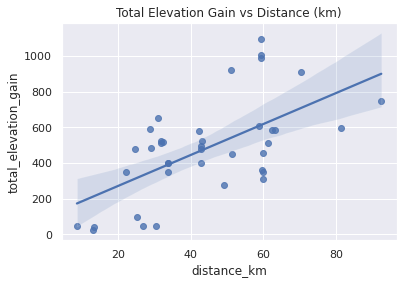

In [14]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='distance_km', y = 'total_elevation_gain', data = dfStravaWithElv).set_title("Total Elevation Gain vs Distance (km)")

* Average Speed (km/h) vs Total Elevation Gain (m)

There is not a correlation between the metrics. 

Text(0.5, 1.0, 'Average Speed (km/h) vs Total Elevation Gain (m)')

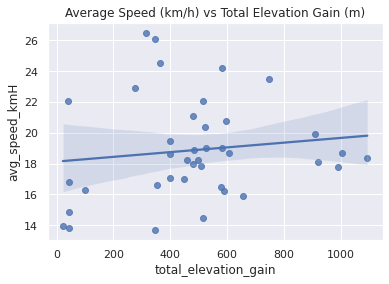

In [15]:
sns.set(style="ticks", context="talk")
sns.set_theme(style="darkgrid")
sns.regplot(x='total_elevation_gain', y = 'avg_speed_kmH', data = dfStravaWithElv).set_title("Average Speed (km/h) vs Total Elevation Gain (m)")

* Time Spent in activities

The distribution of the data is different in this case. Meanwhile, with the indoor data we have a majority of records with 0 hours registered (since 00:01 until 00:59 minutes) without that we can see the majority of the time spent is around of 02 hours until 03 hours for each activity.

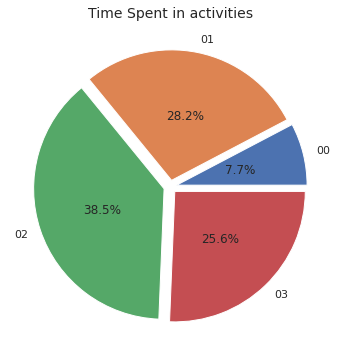

In [16]:
data = dfStravaWithElv.groupby("hours")["hours"].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Time Spent in activities", fontsize=14);

* Total Distance (Km) by week day

The sunday still being the day with most distance covered. The difference in this chart against the chart with the indoor data, is the order of the Tuesday total distance covered. That means the Tuesday is the day with more indoor trainings.

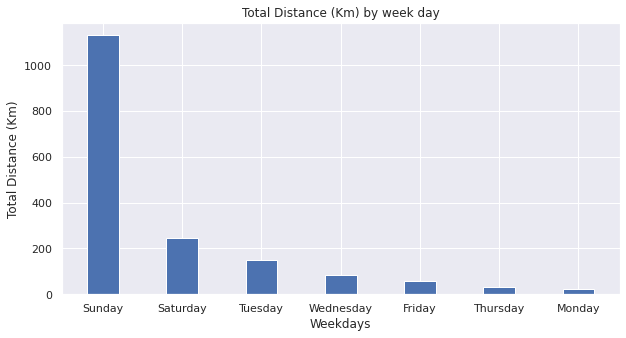

In [17]:
data = dfStravaWithElv.groupby("weekday").sum().reset_index()[['weekday','distance_km']].sort_values('distance_km', ascending=False)

weekdays = data['weekday']
totalDistance = data['distance_km']
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(weekdays, totalDistance,
        width = 0.4)
 
plt.xlabel("Weekdays")
plt.ylabel("Total Distance (Km)")
plt.title("Total Distance (Km) by week day")
plt.show()

# References:

* How to extract Strava data with API: https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde
* Code to extract Strava data: https://github.com/franchyze923/Code_From_Tutorials/blob/master/Strava_Api/strava_api.py
